In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os

%matplotlib inline

In [2]:
def calc_fullwidth_xmax(height=0.5, spek_fn=None, x=None, y=None):
    if x is not None and y is not None:
        freq = x
        real = y
    else:
        freq, real, imag = load_spek(spek_fn)

    spek_argmax = np.argmax(real)
    spek_max = real[spek_argmax]
    xmax = spek_max * height

    lower = np.argmin(np.abs(real[:spek_argmax] - xmax))
    higher = np.argmin(np.abs(real[spek_argmax:] - xmax))

    freq_diff = freq[spek_argmax + higher] - freq[lower]
    return freq_diff

In [3]:
fn = sorted(glob.glob("./*.fft"))

In [4]:
fn

['./deltaqq0.010.fid.fft',
 './deltaqq0.015.fid.fft',
 './deltaqq0.020.fid.fft',
 './deltaqq0.025.fid.fft',
 './deltaqq0.030.fid.fft',
 './deltaqq0.035.fid.fft',
 './deltaqq0.040.fid.fft',
 './deltaqq0.045.fid.fft',
 './deltaqq0.050.fid.fft']

(-200, 200)

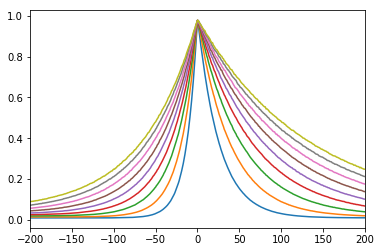

In [5]:
for f in fn:
    i, omega, re, im, r, phi = np.loadtxt(f, unpack=True)
    plt.plot(i, re)
plt.xlim(-200, 200)

(-200, 200)

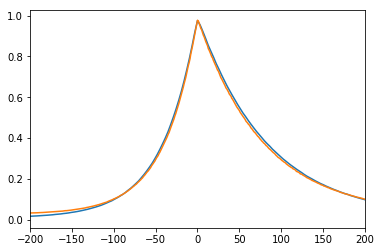

In [6]:
i, omega, re, im, r, phi = np.loadtxt(fn[0], unpack=True)
plt.plot(i*3.2, re)
i, omega, re, im, r, phi = np.loadtxt(fn[4], unpack=True)
plt.plot(i, re)
plt.xlim(-200, 200)

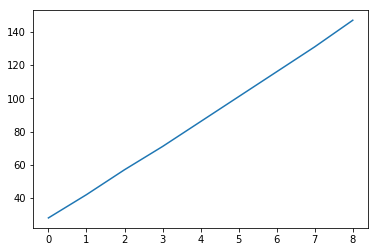

In [9]:
fwhm = np.zeros(len(fn))
for j, f in enumerate(fn):
    i, omega, re, im, r, phi = np.loadtxt(f, unpack=True)
    fwhm[j] = calc_fullwidth_xmax(x=i, y=re)
plt.plot(fwhm)

In [11]:
i, mini, maxi, count = np.loadtxt("/home/jens/Documents/lit/2017 - Joachim Beerwerth/Messdaten/CRN_87Rb/Spektren/spectrum.frequency.norm.hist", unpack=True)

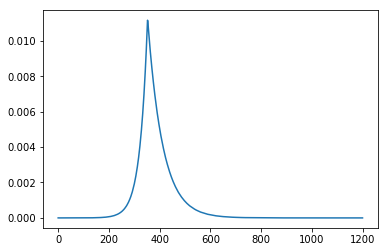

In [12]:
plt.plot(i, count)

In [13]:
i1, omega1, re1, im1, r1, phi1 = np.loadtxt(fn[0], unpack=True)

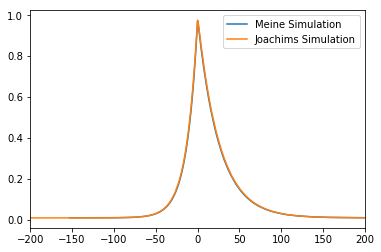

In [14]:
plt.plot((i-352)/2.3, count/0.0116 + 0.01, label="Meine Simulation")
plt.plot(i1, re1, label="Joachims Simulation")
plt.xlim(-200, 200)
plt.legend()
fig_joachim_ich_vergleich = plt.gcf()

In [15]:
fig_joachim_ich_vergleich.savefig("plots/Vergleich_Joachims_Meine_Spektren.pdf", bbox_inches="tight")

In [16]:
spek320 = np.loadtxt("/home/jens/Documents/projekte/crn/170912/SPEK/temp_abh/320K/1783_CRN_T2_320K/CRN_T2_320K_1783_1.ts.spec.nmr", comments="!")
freq320 = spek320[:,0]
real320 = spek320[:,1]

(-150000, 150000)

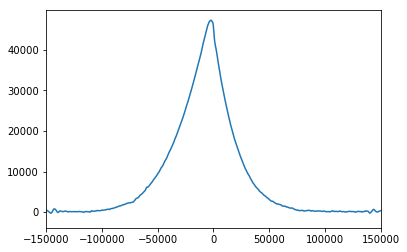

In [17]:
plt.plot(freq320, real320)
plt.xlim(-150000, 150000)

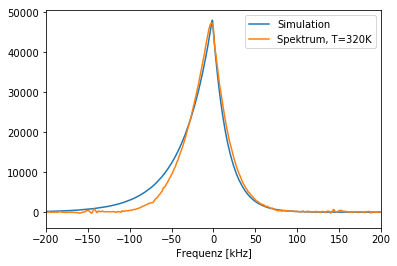

In [18]:
plt.plot((i-350)*-600/1e3, count*4300000 + 0.01, label="Simulation")
plt.plot(freq320/1e3, real320, label="Spektrum, T=320K")
plt.xlim(-200, 200)
plt.legend()
plt.xlabel("Frequenz [kHz]")
fig_vergleich_320_sim = plt.gcf()

In [19]:
fig_vergleich_320_sim.savefig("plots/Vergleich_320K_Simulation.pdf")

In [20]:
spek340 = np.loadtxt("/home/jens/Documents/projekte/crn/170912/SPEK/temp_abh/340K/1835_CRN_T2_340K/CRN_T2_340K_1835_1.ts.spec.nmr", comments="!")
freq340 = spek340[:,0]
real340 = spek340[:,1]

(-150000, 150000)

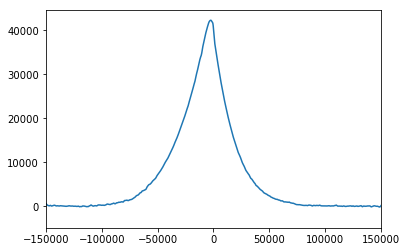

In [21]:
plt.plot(freq340, real340)
plt.xlim(-150000, 150000)

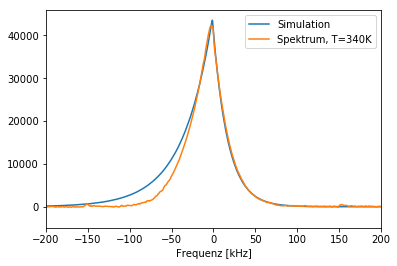

In [22]:
plt.plot((i-350)*-600/1e3, count*3900000 + 0.01, label="Simulation")
plt.plot(freq340/1e3, real340, label="Spektrum, T=340K")
plt.xlim(-200, 200)
plt.legend()
plt.xlabel("Frequenz [kHz]")
fig_vergleich_340_sim = plt.gcf()

In [23]:
fig_vergleich_340_sim.savefig("plots/Vergleich_340K_Simulation.pdf")

In [ ]:
h